In [21]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List, Literal

In [23]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int
    
    equation: str
    discriminant: float
    result: str

In [24]:
def show_equation(state: QuadState):
    equation = f"{state['a']}x2{state['b']}x{state['c']}"
    return {
        'equation': equation
    }

In [25]:
def calculate_discriminant(state: QuadState):
    discriminant = state['b']**2 - (4 * state['a'] * state['c'])
    return {
        'discriminant': discriminant
    }

In [26]:
def real_roots(state: QuadState):
    root1 = (-state['b'] + state['discriminant']**0.5) / (2 * state['a'])
    root2 = (-state['b'] - state['discriminant']**0.5) / (2 * state['a'])
    result = f"The roots are: {root1} and {root2}"
    return {
        'result': result
    }

def repeated_roots(state: QuadState):
    root = -state['b'] / (2 * state['a'])
    result = f"Only repeating root is: {root}"
    return {
        'result': result
    }
    
def no_real_roots(state: QuadState):
    result = "No real roots exist."
    return {
        'result': result
    }

To add condition you create a function -> returns the names of the nodes

In [27]:
def check_condition(state: QuadState) -> Literal['real_roots', 'repeated_roots', 'no_real_roots']:
    if state['discriminant'] > 0:
        return 'real_roots'
    elif state['discriminant'] == 0:
        return 'repeated_roots'
    else:
        return 'no_real_roots'

In [28]:
graph = StateGraph(QuadState)

# nodes
graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_roots', repeated_roots)
graph.add_node('no_real_roots', no_real_roots)

# edges
graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')

#conditional edge
graph.add_conditional_edges('calculate_discriminant', check_condition)

graph.add_edge('real_roots', END)
graph.add_edge('repeated_roots', END)
graph.add_edge('no_real_roots', END)

workflow = graph.compile()

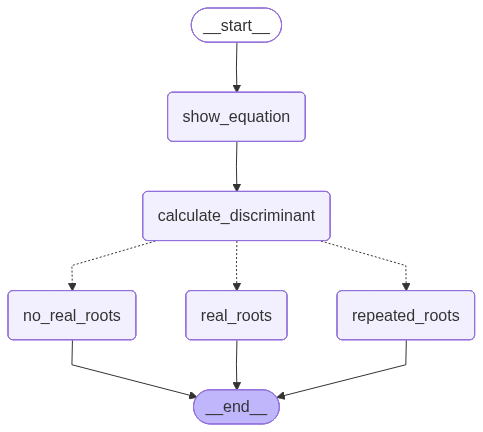

In [29]:
workflow

In [33]:
initial_state = {
    'a': -4,
    'b': -5,
    'c': 6
}

workflow.invoke(initial_state)

{'a': -4,
 'b': -5,
 'c': 6,
 'equation': '-4x2-5x6',
 'discriminant': 121,
 'result': 'The roots are: -2.0 and 0.75'}